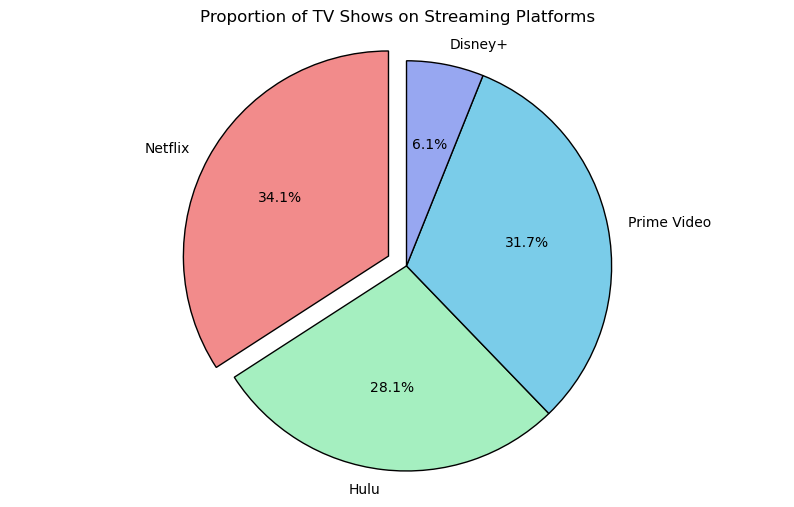

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/tv_shows.csv')

colors = ['#F28B8B', '#A5EFC0', '#7ACCE9', '#97A7F1']
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platform_counts = [df[platform].sum() for platform in platforms]

fig, ax = plt.subplots(figsize=(10, 6))

explode = (0.1, 0, 0, 0)
ax.pie(platform_counts, explode=explode, labels=platforms, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
ax.axis('equal')  

plt.title('Proportion of TV Shows on Streaming Platforms')
plt.show()

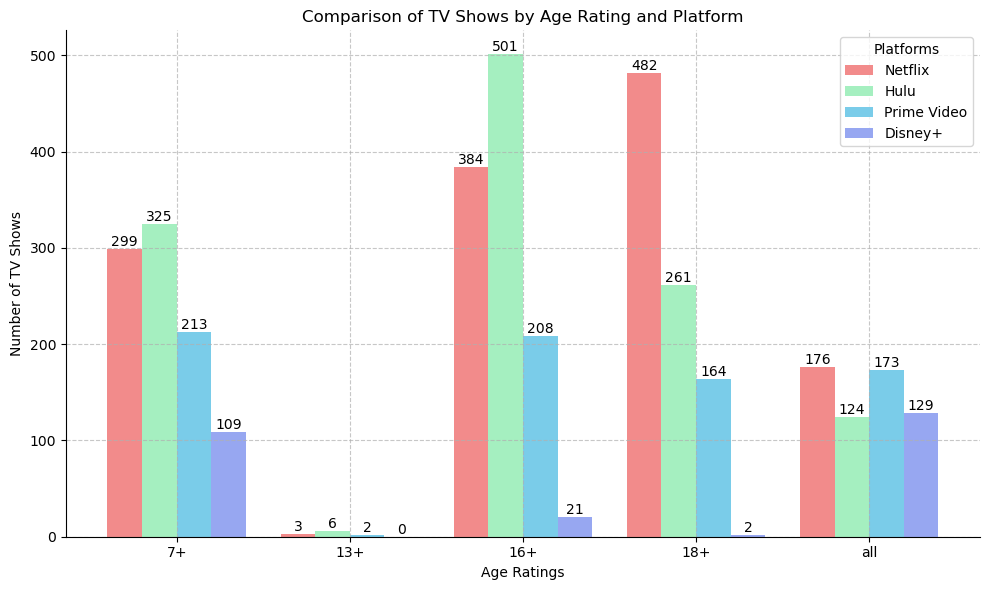

In [59]:
import numpy as np

def sort_age(age):
    if age == '7+':
        return 7
    if age == '13+':
        return 13
    if age == '16+':
        return 16
    if age == '18+':
        return 18
    return 9999

age_counts = {}
for platform in platforms:
    platform_data = df[df[platform] == 1]
    age_counts[platform] = platform_data['Age'].value_counts()

age_categories = sorted(df['Age'].dropna().unique(), key=sort_age)
bar_data = pd.DataFrame(0, index=age_categories, columns=platforms)
for platform in platforms:
    for age in age_categories:
        bar_data.loc[age, platform] = age_counts.get(platform, {}).get(age, 0)

x = np.arange(len(age_categories))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

bars = []
for i, platform in enumerate(platforms):
    bars.append(
        ax.bar(
            x + i * bar_width,
            bar_data[platform],
            bar_width,
            label=platform,
            color=colors[i]
        )
    )

for bar in bars:
    ax.bar_label(bar, label_type='edge')

ax.set_xlabel('Age Ratings')
ax.set_ylabel('Number of TV Shows')
ax.set_title('Comparison of TV Shows by Age Rating and Platform')
ax.set_xticks(x + bar_width * (len(platforms) - 1) / 2)
ax.set_xticklabels(age_categories)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(title="Platforms")

plt.tight_layout()
plt.show()